<a href="https://colab.research.google.com/github/rizkinahayyuni/PCVK_Genap_2022/blob/main/UAS_PCVK_Kelompok_1_Car_Park_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS PENGOLAHAN CITRA DAN VISI KOMPUTER**
# **Car Park Detection**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Car Park Manual**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
# Membaca gambar
car = cv.imread('/content/drive/MyDrive/DATA/uas/2012-10-23_08_30_51.jpg', 0)
car2 = cv.imread('/content/drive/MyDrive/DATA/uas/2012-10-23_08_30_51.jpg')
car3 = car2.copy()

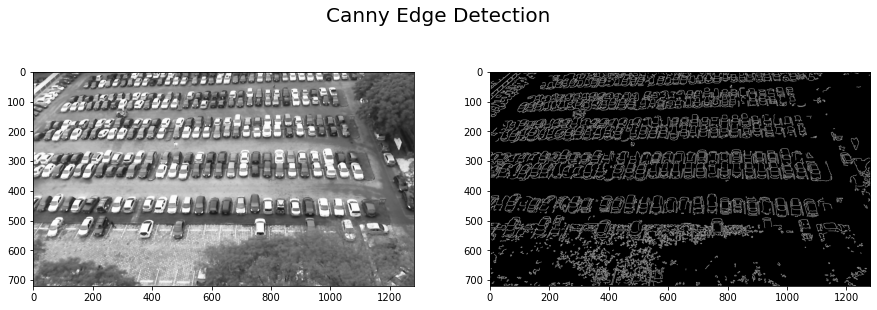

In [5]:
# Operator Canny akan menghasilkan tepi objek yang memiliki ketebalan satu piksel.
# cv.Canny(img, low_threshold, high_threshold) 
# low_threshold = 100, high_threshold = 225

car_edges = cv.Canny(car,100,225)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Canny Edge Detection", fontsize=20)
plt.subplot(121),plt.imshow(cv.cvtColor(car, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(car_edges,cmap = 'gray')
plt.show()

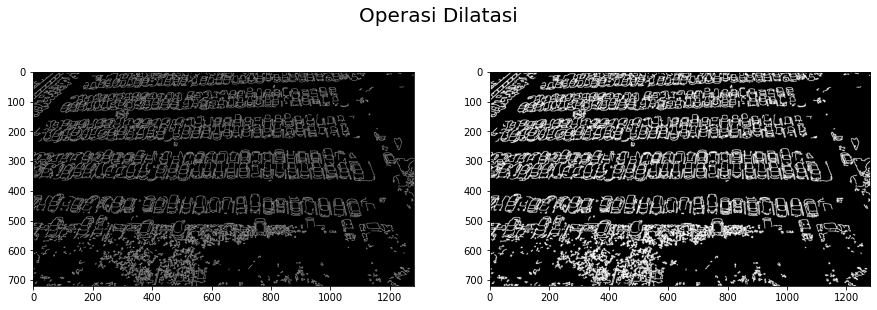

In [6]:
# Operasi dilasi agar tepi citra menjadi lebih tebal. 
# cv.dilate(edges, kernel, iterations=1)
# edges = citra tepi
# kernel = kernel konvolusi berupa matriks -> 2x2 dengan isi 1
# iterations = jumlah iterasi fungsi yang dilakukan. satu kali iterasi agar penebalan tidak terlalu intens

kernel = np.ones((2,2), np.uint8)

# Operasi dilatasi
car_dilate = cv.dilate(car_edges, kernel, iterations = 1)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Operasi Dilatasi", fontsize=20)
plt.subplot(121),plt.imshow(car_edges,cmap = 'gray')
plt.subplot(122),plt.imshow(car_dilate,cmap = 'gray')
plt.show()

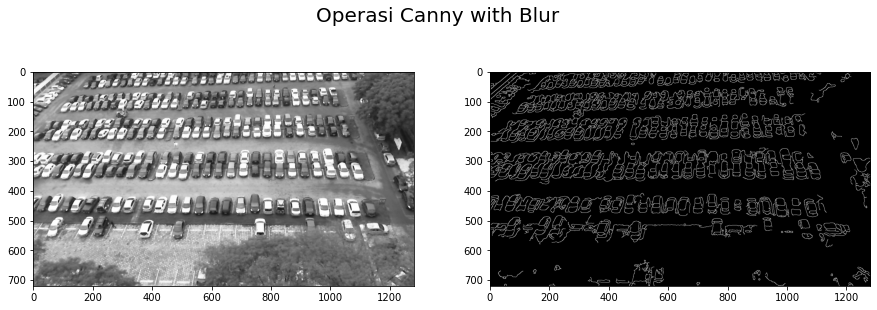

In [7]:
# Canny dengan proses Blur untuk menghilangkan noise yang ada

kern_size = 7
gray_blurred = cv.medianBlur(car, kern_size)
threshold_lower = 10
threshold_upper = 225
edged = cv.Canny(gray_blurred, threshold_lower, threshold_upper)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Operasi Canny with Blur", fontsize=20)
plt.subplot(121),plt.imshow(car,cmap = 'gray')
plt.subplot(122),plt.imshow(edged,cmap = 'gray')
plt.show()

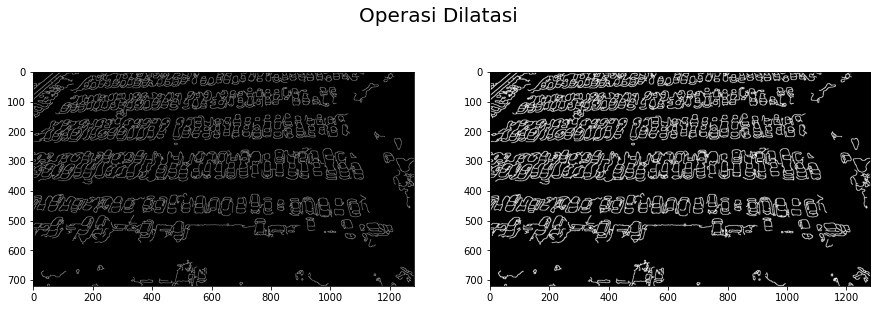

In [8]:
kernel = np.ones((2,2), np.uint8)

# Operasi dilatasi
car_dilate2 = cv.dilate(edged, kernel, iterations = 1)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Operasi Dilatasi", fontsize=20)
plt.subplot(121),plt.imshow(edged,cmap = 'gray')
plt.subplot(122),plt.imshow(car_dilate2,cmap = 'gray')
plt.show()

In [9]:
number_of_white_pix = np.sum(car_dilate2 == 255)
number_of_black_pix = np.sum(car_dilate2 == 0)

print('White Pixel:', number_of_white_pix)
print('Black Pixel: ', number_of_black_pix)

print("Kondisi Tempat Parkir : ")
if (number_of_white_pix >= 135000 ):
  print("Penuh")
elif (number_of_white_pix >= 85000 and number_of_white_pix < 135000):
  print("Hampir Penuh")
elif (number_of_white_pix >= 50000 and number_of_white_pix < 85000):
  print("Sedang")
elif (number_of_white_pix >= 25000 and number_of_white_pix < 50000):
  print("Sepi")
elif (number_of_white_pix < 25000):
  print("Sangat Sepi")

White Pixel: 121707
Black Pixel:  799893
Kondisi Tempat Parkir : 
Hampir Penuh


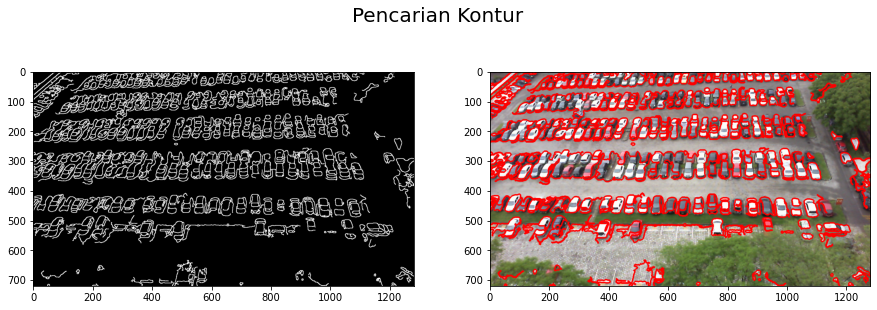

In [10]:
# Countours process
# RETR_EXTERNAL, yang menyebabkan hasil kontur yang dipilih hanyalah bagian luar dari kontur saja. 
# Method yang dipilih adalah CHAIN_APPROX_SIMPLE untuk mensimplifikasi hasil penemuan kontur,
# dengan hanya mengambil beberapa titik yang relevan dengan bentuk objek.

contours, hierarchy = cv.findContours(car_dilate2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(car2, contours, -1, (0,0,255), 3)

# Add Subplot
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.suptitle("Pencarian Kontur", fontsize=20)
plt.subplot(121),plt.imshow(car_dilate2,cmap = 'gray')
plt.subplot(122),plt.imshow(cv.cvtColor(car2, cv.COLOR_BGR2RGB))
plt.show()

Total Mobil Terdeteksi : 52


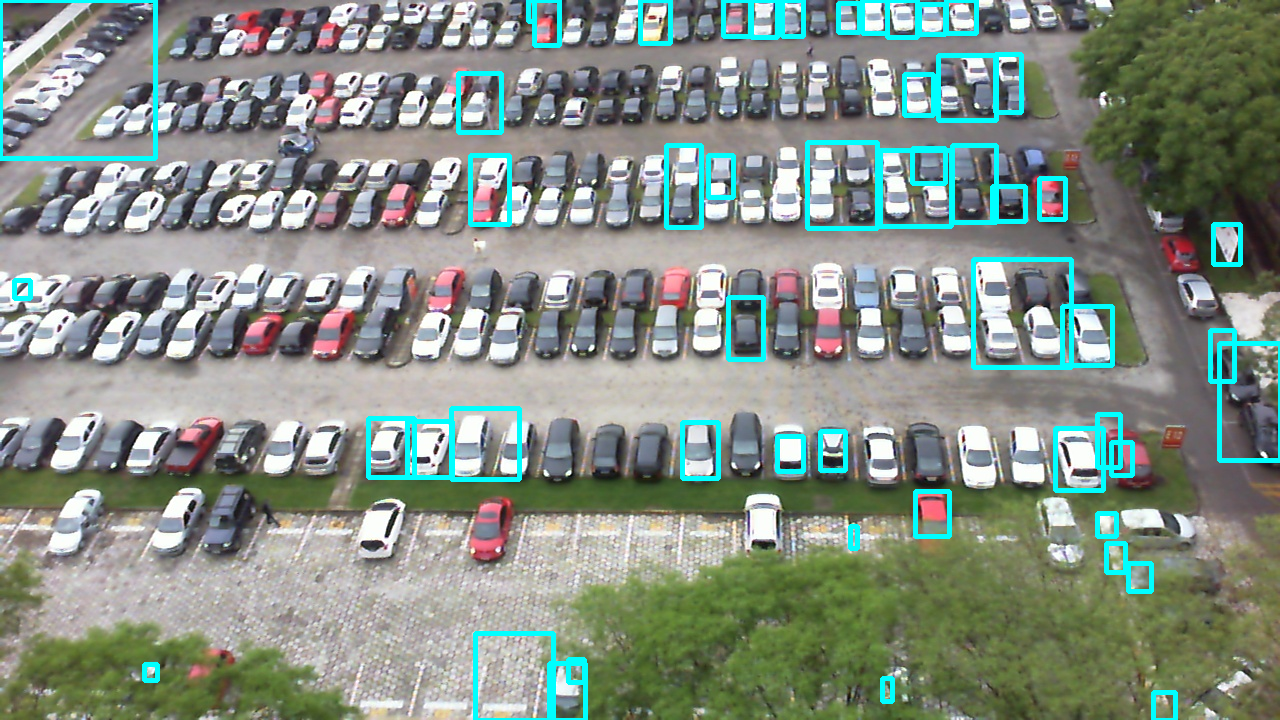

In [11]:
index = 0

for contour in contours:
  x, y, w, h = cv.boundingRect(contour)
  if (w*h >= 100 and h/w > 1.0):
    cv.rectangle(car3, (x,y), (x+w, y+h), (255, 255, 0), 3)
    index += 1

print("Total Mobil Terdeteksi : " + str(index))
cv2_imshow(car3)

**Car Park Detection with Tensorflow**

In [12]:
# Unduh source code model Mask R-CNN (Region based Convolutional Neural Network)
# R-CNN merupakan metode pendeteksian objek yang masuk kedalam ranah computer vision yang berbasis jaringan konvolusi atau CNN
# Tensorflow merupakan library yg dapat melatih dan menjalankan neural network untuk keperluan seperti pengenalan object pada object computer vision

!git clone https://github.com/tensorflow/tpu/

Cloning into 'tpu'...
remote: Enumerating objects: 10883, done.
remote: Counting objects: 100% (1085/1085), done.
remote: Compressing objects: 100% (528/528), done.
remote: Total 10883 (delta 591), reused 967 (delta 533), pack-reused 9798
Receiving objects: 100% (10883/10883), 45.76 MiB | 31.05 MiB/s, done.
Resolving deltas: 100% (7629/7629), done.


In [13]:
from IPython import display
from PIL import Image
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import sys
sys.path.insert(0, 'tpu/models/official')
sys.path.insert(0, 'tpu/models/official/mask_rcnn')
import coco_metric
from mask_rcnn.object_detection import visualization_utils
import cv2
from google.colab.patches import cv2_imshow

TensorFlow 1.x selected.


In [14]:
# Load the COCO index mapping
# COCO adalah dataset deteksi objek, segmentasi, dan teks berskala besar.

# Colab ini menggunakan checkpoint yang telah dilatih sebelumnya dari model Mask R-CNN yang dilatih menggunakan kumpulan data COCO.
# Berikut merupakan pemetaan antara indeks yang diprediksi model dan kategori dalam teks.

ID_MAPPING = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    13: 'stop sign',
    14: 'parking meter',
    15: 'bench',
    16: 'bird',
    17: 'cat',
    18: 'dog',
    19: 'horse',
    20: 'sheep',
    21: 'cow',
    22: 'elephant',
    23: 'bear',
    24: 'zebra',
    25: 'giraffe',
    27: 'backpack',
    28: 'umbrella',
    31: 'handbag',
    32: 'tie',
    33: 'suitcase',
    34: 'frisbee',
    35: 'skis',
    36: 'snowboard',
    37: 'sports ball',
    38: 'kite',
    39: 'baseball bat',
    40: 'baseball glove',
    41: 'skateboard',
    42: 'surfboard',
    43: 'tennis racket',
    44: 'bottle',
    46: 'wine glass',
    47: 'cup',
     48: 'fork',
    49: 'knife',
    50: 'spoon',
    51: 'bowl',
    52: 'banana',
    53: 'apple',
    54: 'sandwich',
    55: 'orange',
    56: 'broccoli',
    57: 'carrot',
    58: 'hot dog',
    59: 'pizza',
    60: 'donut',
    61: 'cake',
    62: 'chair',
    63: 'couch',
    64: 'potted plant',
    65: 'bed',
    67: 'dining table',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remote',
    76: 'keyboard',
    77: 'cell phone',
    78: 'microwave',
    79: 'oven',
    80: 'toaster',
    81: 'sink',
    82: 'refrigerator',
    84: 'book',
    85: 'clock',
    86: 'vase',
    87: 'scissors',
    88: 'teddy bear',
    89: 'hair drier',
    90: 'toothbrush',
}
category_index = {k: {'id': k, 'name': ID_MAPPING[k]} for k in ID_MAPPING}

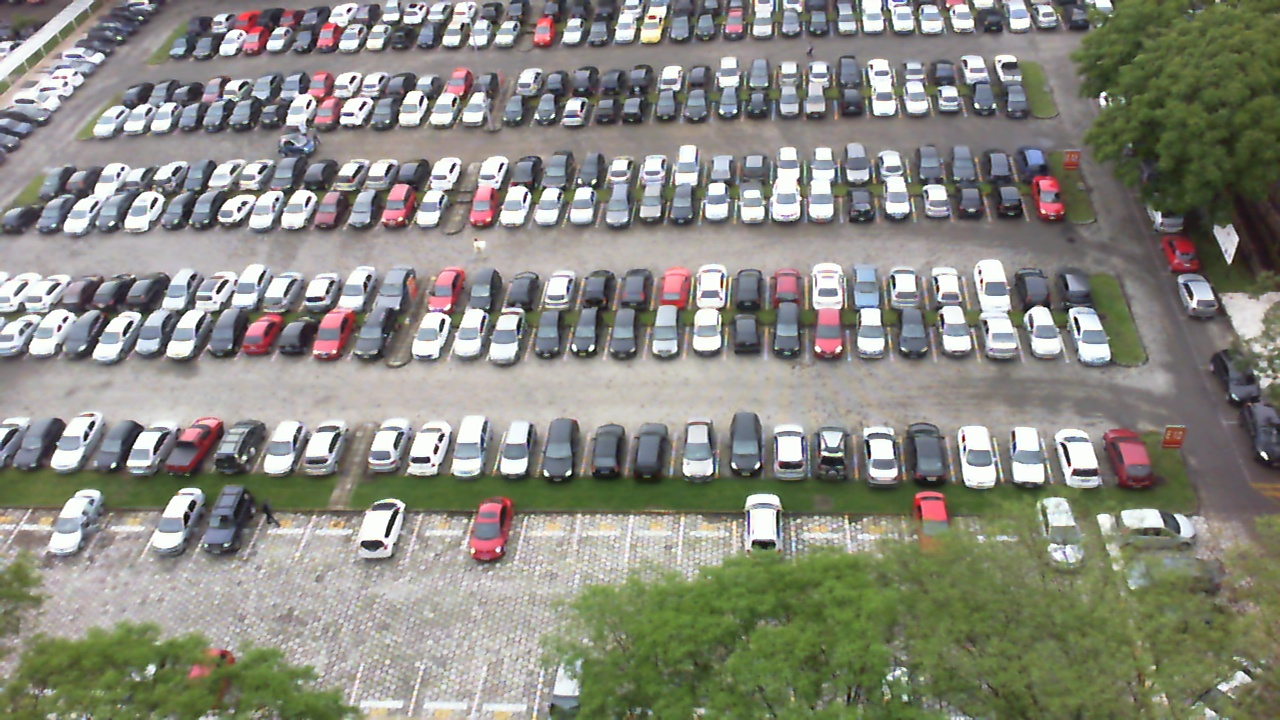

In [15]:
car_image = '/content/drive/MyDrive/DATA/uas/2012-10-23_08_30_51.jpg'

with open(car_image, 'rb') as f:
  np_image_string = np.array([f.read()])
  
image = Image.open(car_image)
width, height = image.size
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image(car_image))

In [16]:
# Create a Tensorflow session to run the inference
session = tf.Session(graph=tf.Graph())

# Loading the COCO pretrained saved model from the public GCS bucket.
saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850'
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://cloud-tpu-checkpoints/mask-rcnn/1555659850/variables/variables


In [17]:
# Perform instance segmentation and retrieve the predictions
# Run the inference and process the predictions from the model.

num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
    ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
    feed_dict={'Placeholder:0': np_image_string})

num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)

In [18]:
det_class=[]
det_box=[]
det_score=[]
seg=[]

for i in range(len(detection_classes)):
  if detection_classes[i]==3:
    det_class.append(detection_classes[i])
    det_box.append(detection_boxes[i])
    det_score.append(detection_scores[i])
    seg.append(segmentations[i])

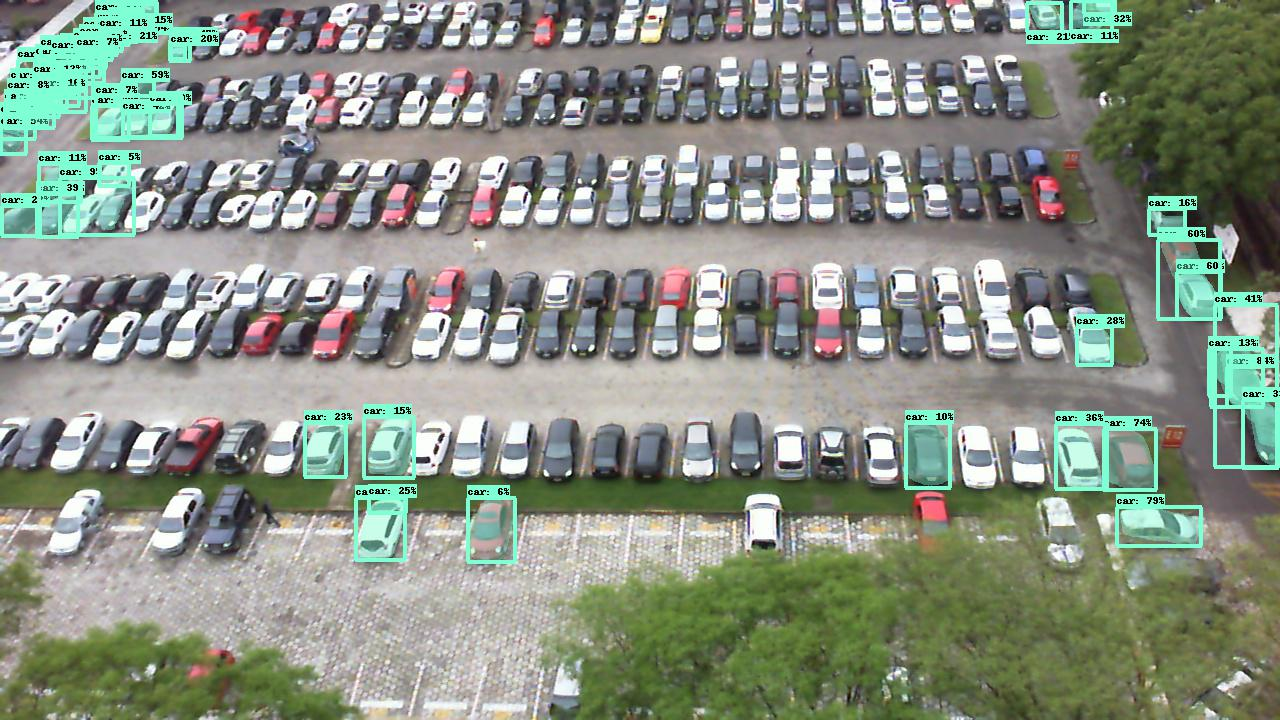

In [19]:
seg1=np.array(seg)
det_class1=np.array(det_class)
det_box1=np.array(det_box)
det_score1=np.array(det_score)

# Visualize the detection results

max_boxes_to_draw = 100
min_score_thresh = 0.01

image_with_detections = visualization_utils.visualize_boxes_and_labels_on_image_array(
    np_image,
    det_box1,
    det_class1,
    det_score1,
    category_index,
    instance_masks=seg1,
    use_normalized_coordinates=False,
    max_boxes_to_draw=max_boxes_to_draw,
    min_score_thresh=min_score_thresh)
output_image_path = 'test_results.jpg'
Image.fromarray(image_with_detections.astype(np.uint8)).save(output_image_path)
display.display(display.Image(output_image_path, width=1024))

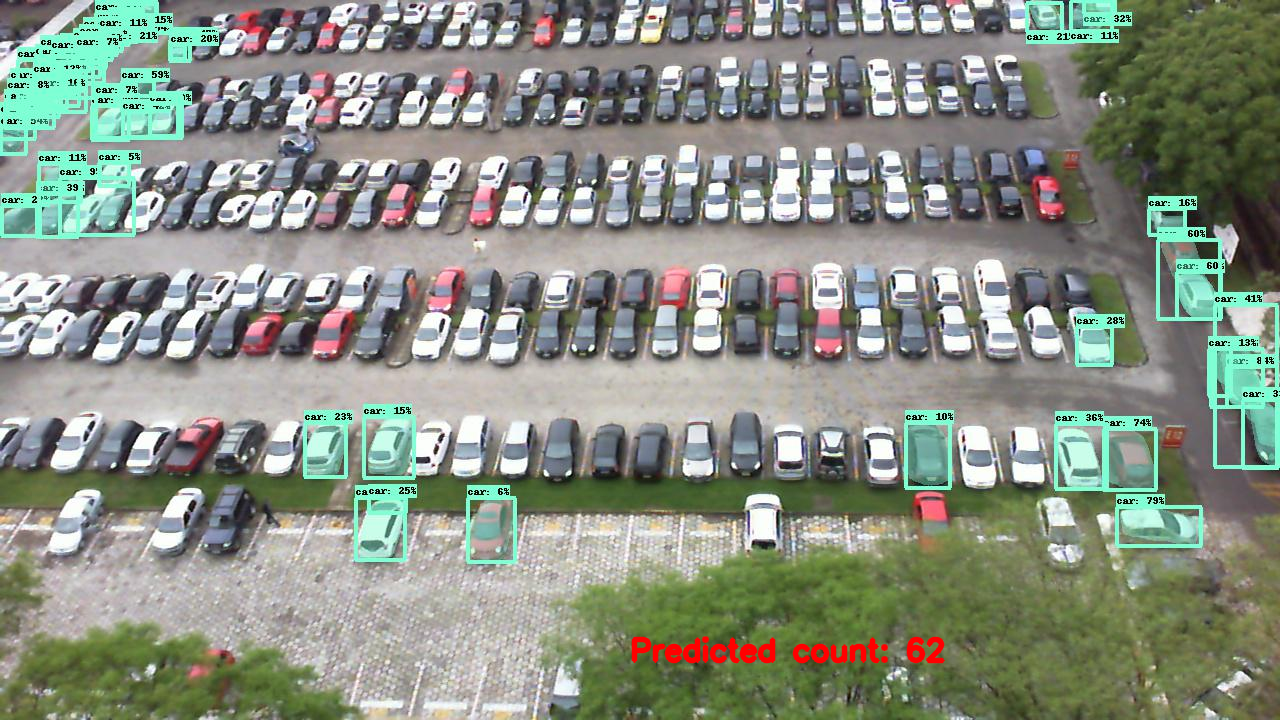

In [20]:
string = 'Predicted count: ' + str(len(det_class)) 
image = cv2.imread('/content/test_results.jpg')

window_name = 'Image'
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (630, 660) 
fontScale = 1 
color = (0, 0, 255)  
thickness = 3
image = cv2.putText(image, string, org, font,  
                   fontScale, color, thickness, cv2.LINE_AA)  

cv2_imshow(image)